# Biomedical Data Science HW2
## BME4760
This assignment explores a dataset of biomedical voice measurements from patients with Parkinson's disease (PD). We will apply k-nearest neighbors classifier with holdout + cross-validation in order to discriminate healthy individuals vs. individuals with PD. GridSearchCV is used to find the optimal k in k-nearest neighbors and a random state is set for the splitting of the data to preserve replication.

## Loading Data
Loading of .csv is done through pandas onto a dataframe. (OPTIONAL) The option displays were to view the entirety of the tables which was a 195 x 24 displayed by <b> df.shape </b>. There are 195 patients within this dataset along with 24 features.

In [37]:
import pandas as pd
df = pd.read_csv("data.csv")
#pd.options.display.max_rows=200
#pd.options.display.max_columns=200
df.shape

(195, 24)

Displayed are the value amounts of healthy and parkinson's disease patients in a bar graph below. There are more parkinsons patients than healthy patients. To provide a more fair classification, stratification is applied ot the datasets to preserve the same ratio within the training and dataset.

([<matplotlib.axis.YTick at 0x2703413c5c0>,
 <a list of 2 Text yticklabel objects>)

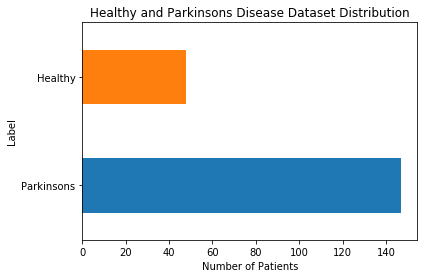

In [38]:
import matplotlib.pyplot as plt

pd.value_counts(df['status']).plot(kind="barh")

value = [0,1]
names = ['Parkinson''s','Healthy']

plt.title('Healthy and Parkinson''s Disease Dataset Distribution')
plt.xlabel('Number of Patients')
plt.ylabel('Label')
plt.yticks(value,names)

X represents the training data itself while y represents the respective labels. The training data consists of different particular voice measures where each row corresponds to one of the 195 voice recordings from the individuals. The first feature <b>"name"</b> is excluded since it is used for identification. The last feature is used as the label where the status describes 0 for healthy patients and a 1 for patients with PD. The rest of the features (n=22) are used as the training data to create our model.

In [39]:
X = df.loc[:,'MDVP:Fo(Hz)':'PPE'].values
y = df.loc[:,'status'].values
print(X.shape)
print(y.shape)

(195, 22)
(195,)


## Splitting Training and Test Data
The training and test data will be split 80/20 with stratification of the data to preserve the ratios between healthy and parkinsons patients. Cross-validation will average results between 5-folds of the training data. I have chosen 5-folds instead of 10-folds due to the relatively small data set. Typically the 10-folds are used as a better estimator, but at a higher computational cost.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                    test_size=0.20,
                    stratify=y,
                    random_state=4760)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (156, 22)
y_train shape:  (156,)
X_test shape:  (39, 22)
y_test shape:  (39,)


## Making Pipeline

The pipeline will take in training and test components and run dimensionality and scaling on these data sets. The learning algorithm is additionally applied to make it more streamline. The k-nearest neighbors algorithm is applied to the pipeline as our machine learning model of choice.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier())

## Optimal Parameterization

A grid search cross-validation is used to determine the best number of neighbors for knn. We test from 4-10 neighbors using a 5-fold cross-validation due to the size of the data set. Based on the random seed randomising the training and test set, the optimal neighbors would vary. In our case, the optimal k value for knn is 9.

In [42]:
from sklearn.grid_search import GridSearchCV

k_range = [4,5,6,7,8,9,10]
param_grid = [{'kneighborsclassifier__n_neighbors':k_range}]

grid = GridSearchCV(estimator=pipeline, param_grid = param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.9038461538461539
{'kneighborsclassifier__n_neighbors': 9}


The best estimator for this randomized training and test set is under grid.best_estimator_. This was used to calculate a training accuracy to see how well it performs.

In [43]:
clf = grid.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.2f' % clf.score(X_test, y_test))

Test accuracy: 0.85


## Learning and Validation Curves
The learning and validation curves are shown below. The learning curve uses the previous pipeline defined earlier in this code to see how well it learns through 5-fold cross-validation. Both the training and validation curve slowly converge to one another with the validation being almost identical with the 9 neighbors parameter.

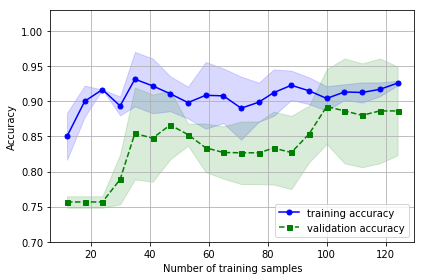

None


In [44]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,20), cv=5, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 1.03])
plt.tight_layout()
print(plt.show())

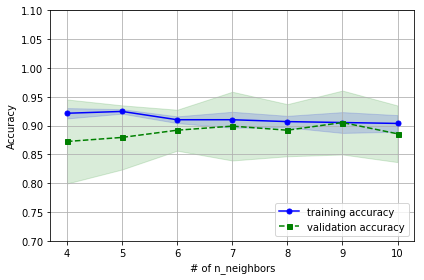

In [45]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(estimator=pipeline, X=X_train, y=y_train, param_name='kneighborsclassifier__n_neighbors', param_range=k_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(k_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(k_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(k_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(k_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('# of n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.1])
plt.tight_layout()
plt.show()